In [1]:
UNET_3D = r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\3D.tif"
UNET_2D = r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\2D.tif"
Ground_Truth = r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\ground_truth.tif"
Wide_Field = r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\wide_field.tif"

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import io
import skimage.io
import skimage.util
from tifffile import imsave
import scipy.ndimage
from skimage.measure import profile_line

In [3]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import normalized_root_mse as nrmse

In [4]:
my_list = UNET_3D, UNET_2D, Ground_Truth, Wide_Field = [r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\3D.tif",
                                                        r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\2D.tif",
                                                        r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\ground_truth.tif",
                                                        r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure 3\wide_field.tif"]

In [5]:
order_list = ['UNET_3D', 'UNET_2D', 'Ground_Truth', 'Wide_Field']

In [6]:
second_list = []
for i in my_list:
    second_list.append(io.imread(i))

In [7]:
print(second_list[0].shape)
print(second_list[1].shape)
print(second_list[2].shape)
print(second_list[3].shape)

(64, 1024, 1024)
(64, 1024, 1024)
(64, 1024, 1024)
(53, 512, 512)


In [8]:
second_list[3] = scipy.ndimage.zoom(second_list[3][0:32], zoom = (2,2,2), order = 1)

In [9]:
print(second_list[0].shape)
print(second_list[1].shape)
print(second_list[2].shape)
print(second_list[3].shape)

(64, 1024, 1024)
(64, 1024, 1024)
(64, 1024, 1024)
(64, 1024, 1024)


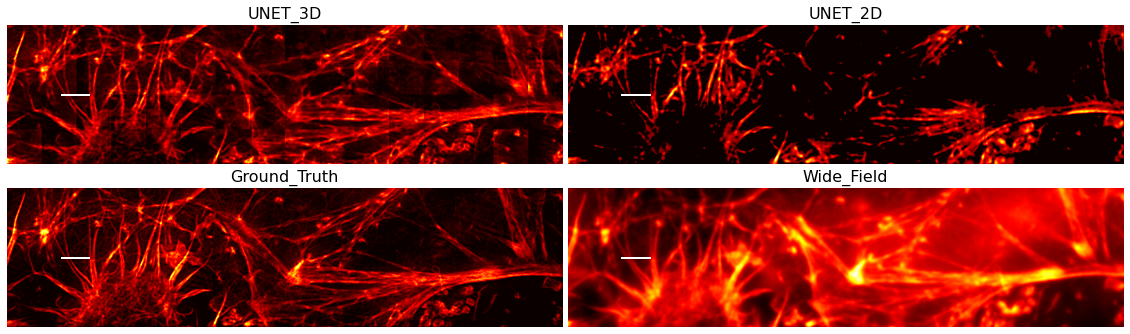

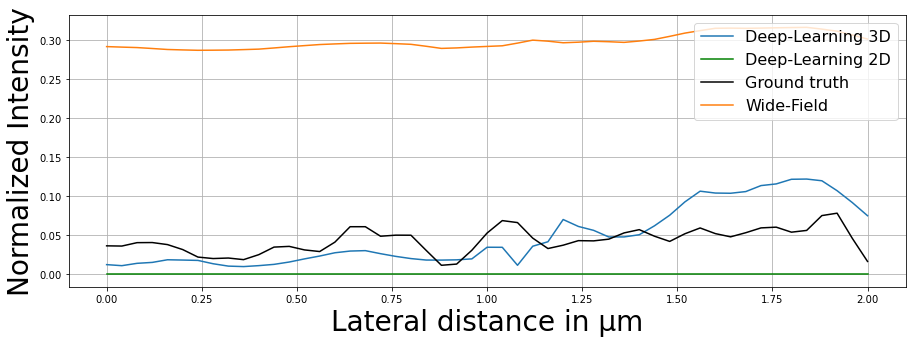

In [13]:
length = 50
move_x = 100

# profile line
start_2 = (second_list[0][11,768:1024,:].shape[0]//2,move_x)
end_2 = (second_list[0][11,768:1024,:].shape[0]//2, move_x+length)

#####


columns = 2
rows = 2

fig, ax = plt.subplots(rows, columns, figsize=(20, 6)) # setup the figures
#fig.tight_layout(pad=0.0)


plt.axis('off')


spoon = slice(512,768)


count = 0
for i in range(columns):
    for j in range(rows):
        ax[i,j].imshow(second_list[count][11,768:1024,:]/np.max(second_list[count][11,768:1024,:]), cmap = 'hot') #testing
        #ax[i,j].imshow(second_list[count][11,spoon,:]/np.max(second_list[count][11,spoon,:]), cmap = 'hot') #validation
        ax[i,j].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2) #Plot a red line across the film
        count+=1

for i in range(columns):
    for j in range(rows):
        ax[i,j].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)

title_list = ["UNET_3D", "UNET_2D", "Ground_Truth", "Wide_Field"]

count = 0
for i in range(columns):
    for j in range(rows):
        ax[i,j].set_title(title_list[count], fontsize =16)
        count+=1
        
# ax[0,0].set_title('3D UNet')
# ax[1].set_title('2D UNet')
# ax[2].set_title('Ground truth')
# ax[3].set_title('Wide-field')

#fig.savefig('comparison.png') 

######################################################

profile_dic = {}

for i in range(4):
    profile_dic[order_list[i]] = profile_line(second_list[i][11,768:1024,:], start_2, end_2, linewidth=1, mode='constant')
    
    
profile = profile_line(second_list[0][11,spoon,:]/np.max(second_list[0][11,spoon,:]), start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_2 = profile_line(second_list[1][11,spoon,:]/np.max(second_list[1][11,spoon,:]), start_2, end_2, linewidth=1, mode='constant') 
profile_3 = profile_line(second_list[2][11,spoon,:]/np.max(second_list[2][11,spoon,:]), start_2, end_2, linewidth=1, mode='constant') 
profile_4 = profile_line(second_list[3][11,spoon,:]/np.max(second_list[3][11,spoon,:]), start_2, end_2, linewidth=1, mode='constant') 




fig_2, ax_2 = plt.subplots(1, 1, figsize=(15, 5)) #Create the figures


#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.08/2) # (80nm/2) calibration to um using info from MBPC paper

ax_2.plot(x1,profile)
ax_2.plot(x1,profile_2, 'g-')
ax_2.plot(x1,profile_3, 'k-')
ax_2.plot(x1,profile_4)

# ax_2.plot(x1,profile_dic['UNET_3D'])
# ax_2.plot(x1,profile_dic['UNET_2D'], 'g-')
# ax_2.plot(x1,profile_dic['Ground_Truth'], 'k-')
# ax_2.plot(x1,profile_dic['Wide_Field'], 'y-')


ax_2.grid()

plt.xlabel("Lateral distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Deep-Learning 3D', 'Deep-Learning 2D', 'Ground truth','Wide-Field'],  fontsize=16, loc='upper right')

In [35]:
# FOR 2d 

print('psnr: ',psnr(second_list[0],second_list[2]))
print('nrmse: ',nrmse(second_list[0],second_list[2]))
print('ssim: ',ssim(second_list[0],second_list[2]))

psnr:  31.57531763345693
nrmse:  0.5495019882773658
ssim:  0.8336541412317222


In [36]:
print('psnr: ',psnr(second_list[1],second_list[2]))
print('nrmse: ',nrmse(second_list[1],second_list[2]))
print('ssim: ',ssim(second_list[1],second_list[2]))

psnr:  23.283945082176487
nrmse:  0.8386482651669893
ssim:  0.635596187653815


In [39]:
# Local

print('3D')
print('psnr: ',psnr(second_list[0][11,768:1024,:],second_list[2][11,768:1024,:]))
print('nrmse: ',nrmse(second_list[0][11,768:1024,:],second_list[2][11,768:1024,:]))
print('ssim: ',ssim(second_list[0][11,768:1024,:],second_list[2][11,768:1024,:]))

3D
psnr:  24.985496096142285
nrmse:  0.4156330773015089
ssim:  0.7594266602584467


In [40]:
print('2D')
print('psnr: ',psnr(second_list[1][11,768:1024,:],second_list[2][11,768:1024,:]))
print('nrmse: ',nrmse(second_list[1][11,768:1024,:],second_list[2][11,768:1024,:]))
print('ssim: ',ssim(second_list[1][11,768:1024,:],second_list[2][11,768:1024,:]))

2D
psnr:  21.317838003306772
nrmse:  0.8037489463124715
ssim:  0.4726376023825278


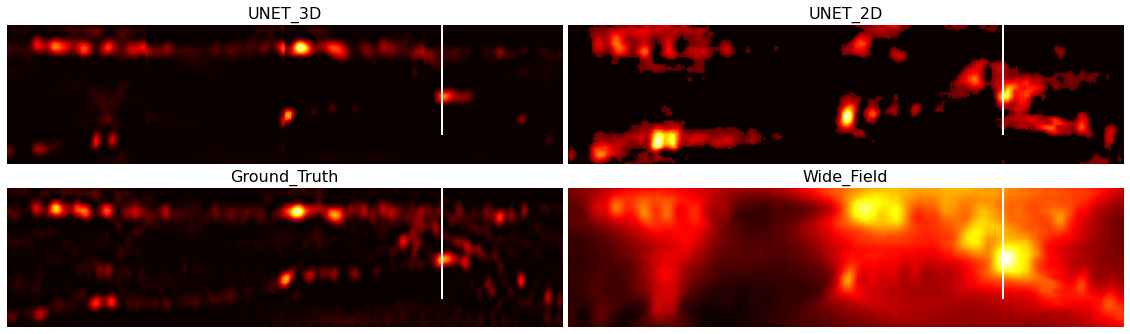

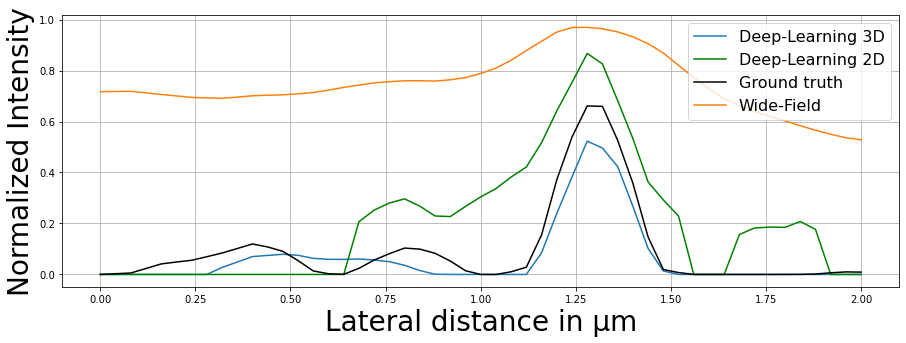

In [79]:
length = 50

x_movt = 200
y_start = 0

start_2 = (y_start,x_movt)
end_2 = (y_start+length, x_movt)


columns = 2
rows = 2

fig, ax = plt.subplots(rows, columns, figsize=(20, 6)) # setup the figures
#fig.tight_layout(pad=0.0)


plt.axis('off')

count = 0
for i in range(columns):
    for j in range(rows):
        ax[i,j].imshow(second_list[count][:,768:1024,250], cmap = 'hot')
        ax[i,j].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2) #Plot a red line across the film
        count+=1

for i in range(columns):
    for j in range(rows):
        ax[i,j].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)

title_list = ["UNET_3D", "UNET_2D", "Ground_Truth", "Wide_Field"]

count = 0
for i in range(columns):
    for j in range(rows):
        ax[i,j].set_title(title_list[count], fontsize =16)
        count+=1
        
profile_axial_list =[]

for i in range(4):
    profile_axial_list.append(profile_line(second_list[i][:,768:1024,250]/np.max(second_list[i][:,768:1024,250]), start_2, end_2, linewidth=1, mode='constant')) #Take the profile line

    
fig_2, ax_2 = plt.subplots(1, 1, figsize=(15, 5)) #Create the figures


#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.08/2) # (80nm/2) calibration to um using info from MBPC paper

ax_2.plot(x1,profile_axial_list[0])
ax_2.plot(x1,profile_axial_list[1], 'g-')
ax_2.plot(x1,profile_axial_list[2], 'k-')
ax_2.plot(x1,profile_axial_list[3])


ax_2.grid()

plt.xlabel("Lateral distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Deep-Learning 3D', 'Deep-Learning 2D', 'Ground truth','Wide-Field'],  fontsize=16, loc='upper right')

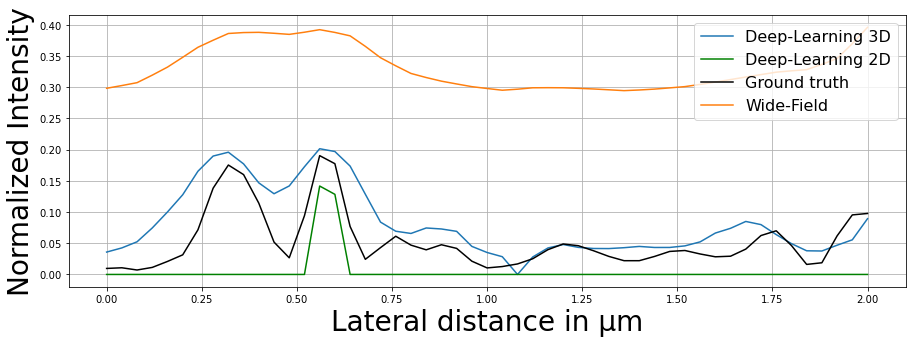

In [73]:
fig_2, ax_2 = plt.subplots(1, 1, figsize=(15, 5)) #Create the figures


#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.08/2) # (80nm/2) calibration to um using info from MBPC paper

ax_2.plot(x1,profile)
ax_2.plot(x1,profile_2, 'g-')
ax_2.plot(x1,profile_3, 'k-')
ax_2.plot(x1,profile_4)

# ax_2.plot(x1,profile_dic['UNET_3D'])
# ax_2.plot(x1,profile_dic['UNET_2D'], 'g-')
# ax_2.plot(x1,profile_dic['Ground_Truth'], 'k-')
# ax_2.plot(x1,profile_dic['Wide_Field'], 'y-')


ax_2.grid()

plt.xlabel("Lateral distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Deep-Learning 3D', 'Deep-Learning 2D', 'Ground truth','Wide-Field'],  fontsize=16, loc='upper right')

In [41]:
# Local

print('3D')
print('psnr: ',psnr(second_list[0][:,768:1024,250],second_list[2][:,768:1024,250]))
print('nrmse: ',nrmse(second_list[0][:,768:1024,250],second_list[2][:,768:1024,250]))
print('ssim: ',ssim(second_list[0][:,768:1024,250],second_list[2][:,768:1024,250]))

3D
psnr:  30.508915828286224
nrmse:  0.6068003572941554
ssim:  0.7824397113994582


In [42]:
print('2D')
print('psnr: ',psnr(second_list[1][:,768:1024,250],second_list[2][:,768:1024,250]))
print('nrmse: ',nrmse(second_list[1][:,768:1024,250],second_list[2][:,768:1024,250]))
print('ssim: ',ssim(second_list[1][:,768:1024,250],second_list[2][:,768:1024,250]))

2D
psnr:  21.64326454309056
nrmse:  0.7756898748581759
ssim:  0.5900630703825372
